In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv', parse_dates = 'DateTime')

In [3]:
data['DateTime'] = pd.to_datetime(data['DateTime'], coerce=True)

In [9]:
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['DayofWeek']=data['DateTime'].dt.weekday

In [10]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day,DayofWeek
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,6
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,5
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,4
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,4


In [11]:
data.groupby('Year').size()

Year
2013     2702
2014    11179
2015    11481
2016     1367
dtype: int64

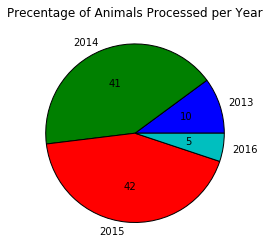

In [43]:
data_year = data.groupby('Year').size().plot(kind = 'pie', figsize = (4,4), autopct='%d')
data_year.set_title('Precentage of Animals Processed per Year')

In [16]:
groupbyyear = data.groupby(['Year', 'OutcomeType'])['OutcomeType'].count()

In [17]:
groupbyyear.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Year,,,,,
2013,1128,16,183,434,941
2014,4358,69,724,1880,4148
2015,4620,104,610,2167,3980
2016,663,8,38,305,353


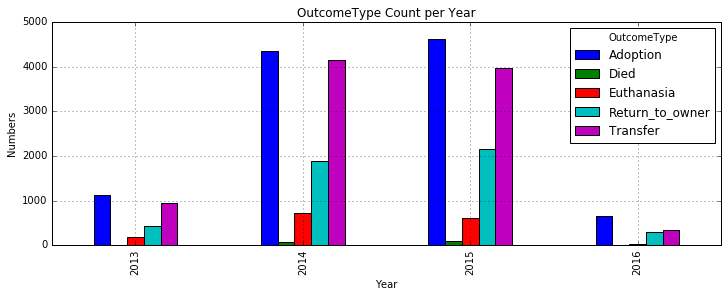

In [24]:
year_plot = groupbyyear.unstack().plot(kind = 'bar', figsize = (12, 4))
year_plot.set_title('OutcomeType Count per Year')
year_plot.set_ylabel('Numbers')

In [25]:
groupbymonth = data.groupby(['Month', 'OutcomeType'])['OutcomeType'].count()
groupbymonth.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Month,,,,,
1,1045,12,117,507,653
2,819,10,109,412,523
3,571,11,108,336,472
4,500,7,101,379,702
5,686,18,130,367,893


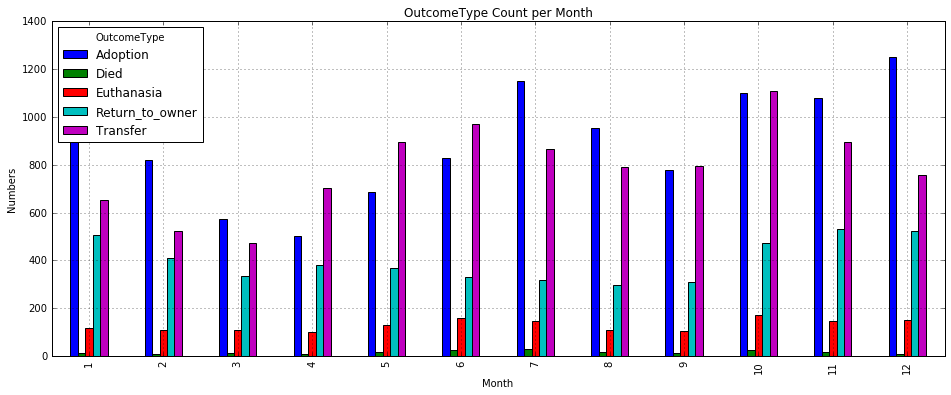

In [27]:
month_plot = groupbymonth.unstack().plot(kind = 'bar', figsize = (16, 6))
month_plot.set_title('OutcomeType Count per Month')
month_plot.set_ylabel('Numbers')

In [28]:
groupbyweekday = data.groupby(['DayofWeek', 'OutcomeType'])['OutcomeType'].count()
groupbyweekday.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
DayofWeek,,,,,
0,1353,27,257,722,1337
1,1330,32,246,736,1552
2,1194,26,231,689,1370
3,1119,20,250,641,1346
4,1248,31,235,648,1424


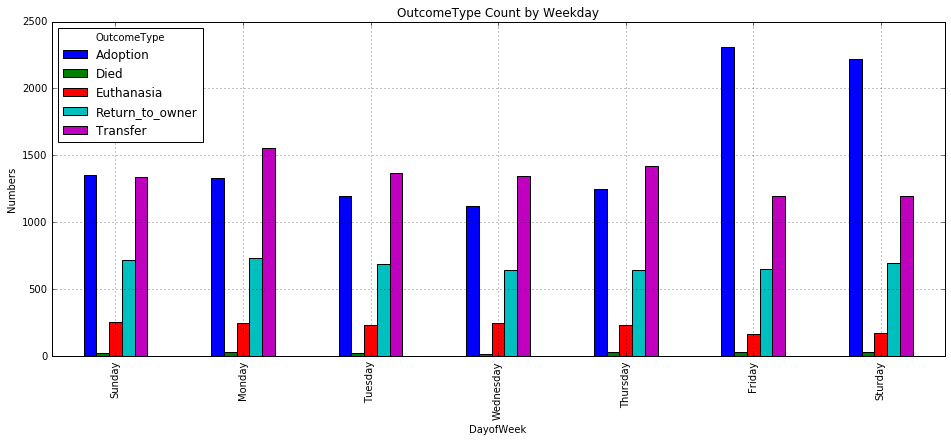

In [34]:
weekday_plot = groupbyweekday.unstack().plot(kind = 'bar', figsize = (16, 6))
weekday_plot.set_title('OutcomeType Count by Weekday')
weekday_plot.set_ylabel('Numbers')
weekday_plot.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Sturday'])

Aha, seems like Adoption is offen seen on Friday and Saturday 

In [36]:
data['Date'] = data['DateTime'].dt.date
groupbydate = data.groupby(['Date', 'OutcomeType'])['OutcomeType'].count()
groupbydate.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Date,,,,,
2013-10-01,7,1,6,7,13
2013-10-02,11,1,2,7,22
2013-10-03,6,NaN,1,5,8
2013-10-04,7,NaN,2,2,1
2013-10-05,24,NaN,1,6,15


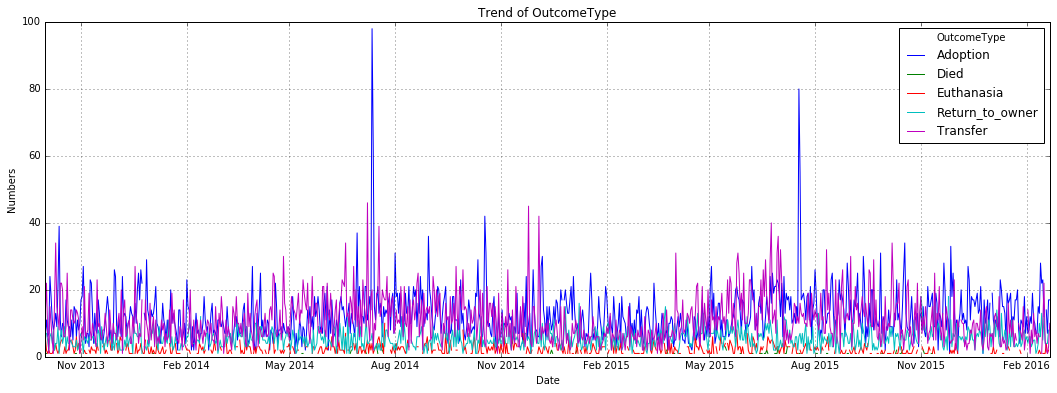

In [39]:
date_plot = groupbydate.unstack().plot(kind = 'line', figsize = (18, 6))
date_plot.set_title('Trend of OutcomeType')
date_plot.set_ylabel('Numbers')

Wow, there are two adoption peaks happening in summer! Maybe it was the anual adoption week in animal shelter. Let's find out these peaks!

In [48]:
groupbydate.unstack().sort(columns = ['Adoption'], ascending = False).head()


OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Date,,,,,
2014-07-12,98,NaN,4,7,20
2015-07-18,80,1,NaN,6,10
2014-07-13,63,NaN,1,4,2
2015-07-19,55,1,2,7,16
2014-10-18,42,NaN,NaN,3,4
